# Power law energy distributions: solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MaxwellBoltzmann(N):
    # Use a rejection method to draw energies for particles 
    # from a Maxwell-Boltzmann distribution
    # The energies are measured in units of kT
    # NB - we ask for N particles, but may get fewer back depending on the 
    # sampling efficiency
    Emax = 15.0
    nsamples = 100 * N
    x = Emax * np.random.rand(nsamples)
    y = Emax * np.random.rand(nsamples) * np.exp(-1)
    x_keep = x[y < x**0.5*np.exp(-x)]
    E = x_keep[:N]
    return E

In [3]:
# First draw a sample of photons from a Maxwell-Boltzmann distribution
T = 1.0
N = int(1e6)
E = MaxwellBoltzmann(N)

print('Number of energies generated = ', len(E))

Number of energies generated =  1000000


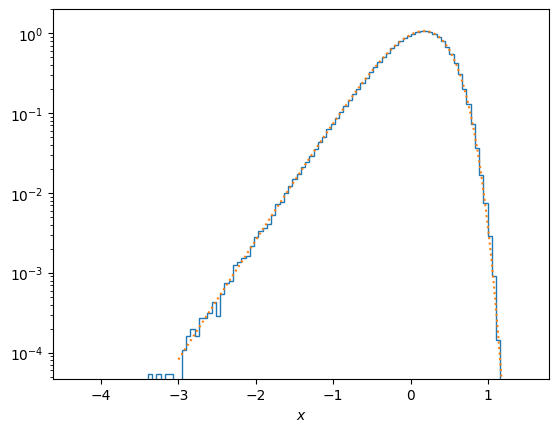

In [4]:
# Compare against the analytic result to make sure the distribution is correct

%matplotlib inline
plt.hist(np.log10(E), density=True, bins=100, histtype = 'step')

# this is the analytic distribution 
# f(x) dx = (2/pi^1/2) x^(1/2) exp(-x) dx
# but written as f(x) dlog_10x
xvals = 10.0**np.linspace(-3.0,1.5,100)
fMB = (2/np.sqrt(np.pi)) * np.sqrt(xvals)**3 * np.exp(-xvals)
plt.plot(np.log10(xvals), fMB * np.log(10.0), ":")

plt.yscale('log')
plt.ylim((np.min(E), 2.0))
plt.xlabel(r'$x$')
plt.show()

In [5]:
Pesc = 0.1  # this is the probability of escape
B = 0.2       # this is the delta E/E on scattering

scatters = np.random.geometric(Pesc, size = len(E)) - 1
Enew = E * (1+B)**scatters

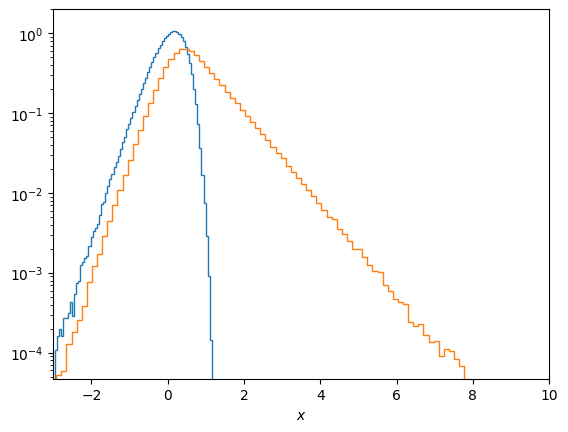

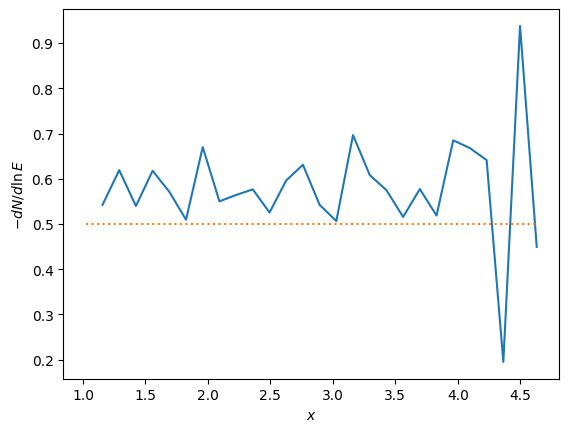

In [6]:
%matplotlib inline
plt.hist(np.log10(E), density=True, bins=100, histtype = 'step')
histf, bins, _ = plt.hist(np.log10(Enew), density=True, bins=100, histtype = 'step')

histx = 0.5*(bins[1:]+bins[:-1])
#plt.plot(histx, histf, "--")
plt.yscale('log')
plt.ylim((np.min(E), 2.0))
plt.xlim((-3, 10))
plt.xlabel(r'$x$')
plt.show()

# compute the slope of the power law
ind = histx>1
hx2 = histx[ind]
hf2 = histf[ind]
ind = hx2<0.5*np.max(hx2)
hx2 = hx2[ind]
hf2 = hf2[ind]
alpha = -np.log(hf2[1:]/hf2[:-1])/(hx2[1:]-hx2[:-1])  / np.log(10.0)
plt.plot(hx2[1:], alpha)
plt.plot((np.min(hx2),np.max(hx2)),(Pesc/B,Pesc/B),':')
plt.xlabel(r'$x$')
plt.ylabel(r'$-dN/d\ln E$')
plt.show()